In [92]:
import networkit as nk
import numpy as np
import pandas as pd
import re
from networkit.graphio import BinaryPartitionReader
import matplotlib.pyplot as plt

In [77]:
all_data = pd.read_csv("../results/time.csv", sep=";")
all_data

,Code,Graph,Partition,Flag,Community computation,Nodes computation,GLR computation,Total
0,python,"2expnode(n=5120, m=50000).graph",NaN,2expnode,0.126090,0.521793,22.314997,22.316076
1,python,"2expnode(n=10240, m=50000).graph",NaN,2expnode,0.398006,1.479210,63.170074,63.172659
2,python,"2expnode(n=640, m=50000).graph",NaN,2expnode,0.010916,0.067044,1.088185,1.088366
3,python,"2expnode(n=40960, m=50000).graph",NaN,2expnode,0.559704,20.016442,553.777280,553.841357
4,python,"2expnode(n=2560, m=50000).graph",NaN,2expnode,0.101592,0.658419,9.872437,9.873072
5,python,"2expnode(n=1280, m=50000).graph",NaN,2expnode,0.028270,0.164938,1.924041,1.924820
6,python,"2expnode(n=20480, m=50000).graph",NaN,2expnode,0.883681,7.292525,177.428714,177.434354
7,C++,"2expnode(n=5120, m=50000).graph",NaN,2expnode,0.082105,0.347021,24.026850,24.036850
8,C++,"2expnode(n=10240, m=50000).graph",NaN,2expnode,0.303680,0.823628,81.556779,81.646779
9,C++,"2expnode(n=640, m=50000).graph",NaN,2expnode,0.209037,0.225236,1.340400,1.342400


In [78]:
pattern = r"n=(\d+),\s*m=(\d+)"
all_data["n"] = all_data['Graph'].apply(lambda graph_name: int(re.search(pattern, graph_name).group(1)))
all_data["m"] = all_data['Graph'].apply(lambda graph_name: int(re.search(pattern, graph_name).group(2)))

In [79]:
all_data["deltaNodesComputation"] = all_data["Nodes computation"] - all_data["Community computation"]
all_data["deltaGLR"] = all_data["GLR computation"] - all_data["Nodes computation"]

In [80]:
programming_language = "python"

##### Utility function

In [127]:
def plot_column(df, column_names, num_row=1, num_colum=1, one_ax=False, figsize=(20,8)):
    if one_ax:
        _, axes = plt.subplots(1, 1, figsize=figsize)
    else:
        _, axes = plt.subplots(num_row, num_colum, figsize=figsize)
    for i in range(len(column_names)):
        ax=axes 
        column_name = column_names[i]
        if (num_row, num_colum) != (1,1) and not one_ax:
           ax = axes[i] 
        if not one_ax:
            ax.set_ylabel(column_name)
        df[column_name].plot(marker="o", ax=ax, label=column_name)
    if one_ax:
         axes.legend()
    plt.show()

# Programming Language Comparison

##### Filter results

In [114]:
all_comparison = all_data[ all_data["Flag"] == "2expnode"]

In [115]:
py_comparison = all_comparison[ all_comparison["Code"] == "python"]
py_comparison = py_comparison.drop(columns=["Code", "m"])
cpp_comparison = all_comparison[ all_comparison["Code"] == "C++"]
cpp_comparison = cpp_comparison.drop(columns=["Code", "m"])

comparison = pd.merge(py_comparison, cpp_comparison, how="inner", on=["n", "Graph", "Partition", "Flag"], suffixes=("_py", "_cpp"))
comparison

,Graph,Partition,Flag,Community computation_py,Nodes computation_py,GLR computation_py,Total_py,n,deltaNodesComputation_py,deltaGLR_py,Community computation_cpp,Nodes computation_cpp,GLR computation_cpp,Total_cpp,deltaNodesComputation_cpp,deltaGLR_cpp
0,"2expnode(n=5120, m=50000).graph",NaN,2expnode,0.126090,0.521793,22.314997,22.316076,5120,0.395702,21.793205,0.082105,0.347021,24.026850,24.036850,0.264916,23.679829
1,"2expnode(n=10240, m=50000).graph",NaN,2expnode,0.398006,1.479210,63.170074,63.172659,10240,1.081204,61.690864,0.303680,0.823628,81.556779,81.646779,0.519948,80.733151
2,"2expnode(n=640, m=50000).graph",NaN,2expnode,0.010916,0.067044,1.088185,1.088366,640,0.056128,1.021142,0.209037,0.225236,1.340400,1.342400,0.016199,1.115164
3,"2expnode(n=40960, m=50000).graph",NaN,2expnode,0.559704,20.016442,553.777280,553.841357,40960,19.456738,533.760837,0.504484,5.059490,637.329749,637.536749,4.555006,632.270259
4,"2expnode(n=2560, m=50000).graph",NaN,2expnode,0.101592,0.658419,9.872437,9.873072,2560,0.556827,9.214019,0.129352,0.232570,9.337017,9.437017,0.103218,9.104447
5,"2expnode(n=1280, m=50000).graph",NaN,2expnode,0.028270,0.164938,1.924041,1.924820,1280,0.136668,1.759103,0.122983,0.146416,1.719227,1.729227,0.023433,1.572811
6,"2expnode(n=20480, m=50000).graph",NaN,2expnode,0.883681,7.292525,177.428714,177.434354,20480,6.408844,170.136189,0.374936,1.635614,293.683707,293.753707,1.260678,292.048093


##### Set number of nodes as ID

In [116]:
comparison.set_index("n", inplace=True)
comparison.sort_index(inplace=True)

##### Compare total time

In [117]:
comparison.filter(regex='Total')

,Total_py,Total_cpp
n,,
640,1.088366,1.342400
1280,1.924820,1.729227
2560,9.873072,9.437017
5120,22.316076,24.036850
10240,63.172659,81.646779
20480,177.434354,293.753707
40960,553.841357,637.536749


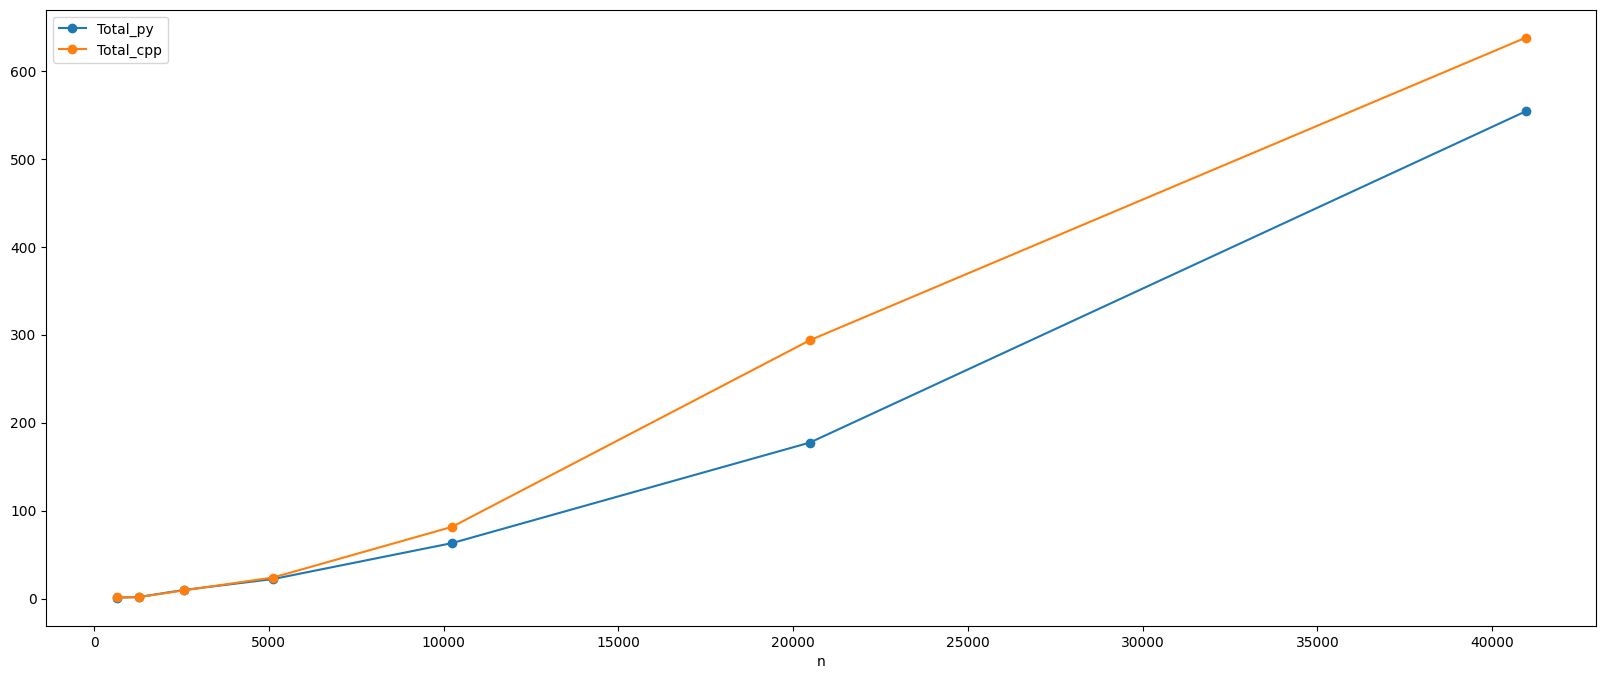

In [128]:
plot_column(comparison, ['Total_py', 'Total_cpp'], one_ax=True)

##### Compare partitionsComputation

In [129]:
comparison.filter(regex="Community computation")

,Community computation_py,Community computation_cpp
n,,
640,0.010916,0.209037
1280,0.028270,0.122983
2560,0.101592,0.129352
5120,0.126090,0.082105
10240,0.398006,0.303680
20480,0.883681,0.374936
40960,0.559704,0.504484


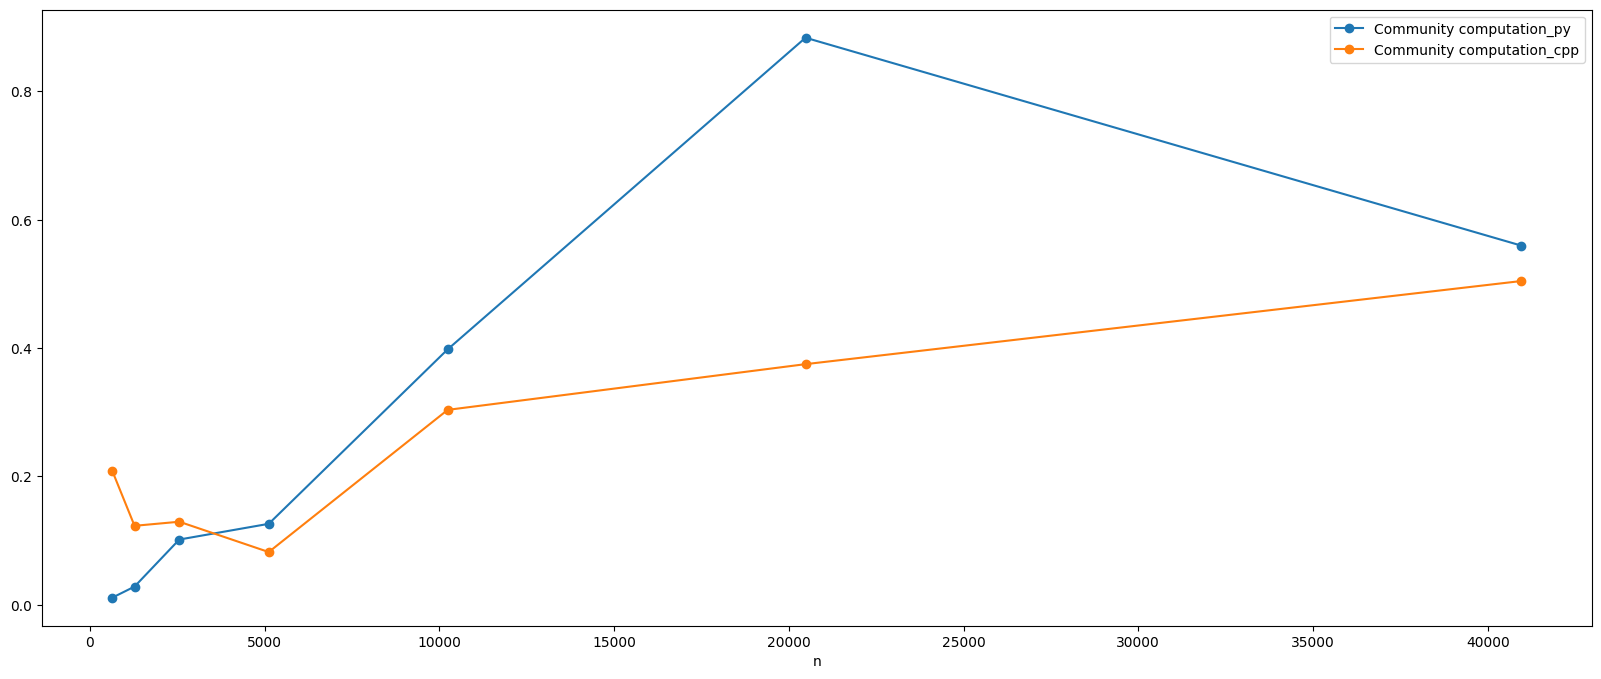

In [131]:
plot_column(comparison, ['Community computation_py', 'Community computation_cpp'], one_ax=True)

##### Compare nodesComputation

In [108]:
comparison.filter(regex="deltaNodesComputation")

,deltaNodesComputation_py,deltaNodesComputation_cpp
n,,
640,0.056128,0.016199
1280,0.136668,0.023433
2560,0.556827,0.103218
5120,0.395702,0.264916
10240,1.081204,0.519948
20480,6.408844,1.260678
40960,19.456738,4.555006


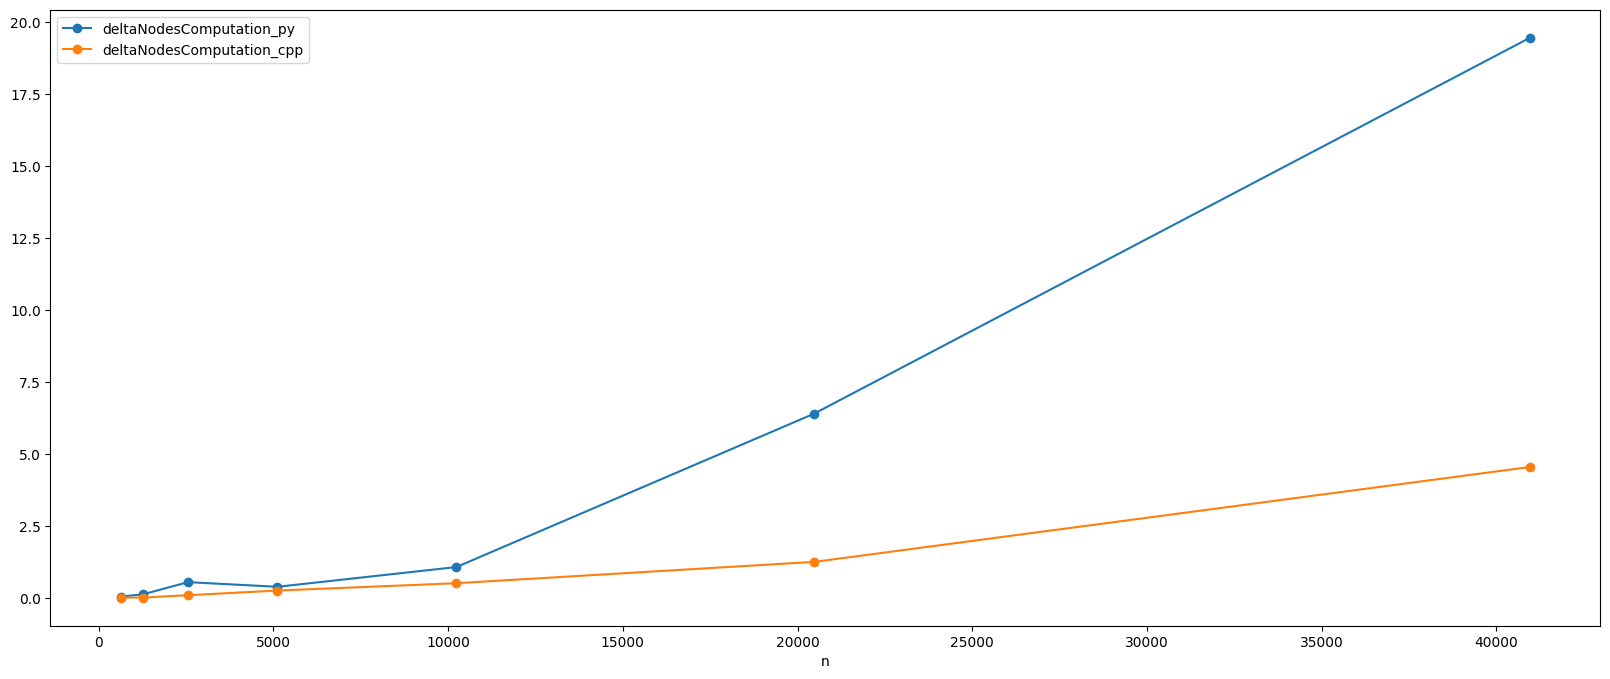

In [132]:
plot_column(comparison, ['deltaNodesComputation_py', 'deltaNodesComputation_cpp'], one_ax=True)

##### Compare deltaGLR

In [ ]:
comparison.filter(regex="deltaGLR")

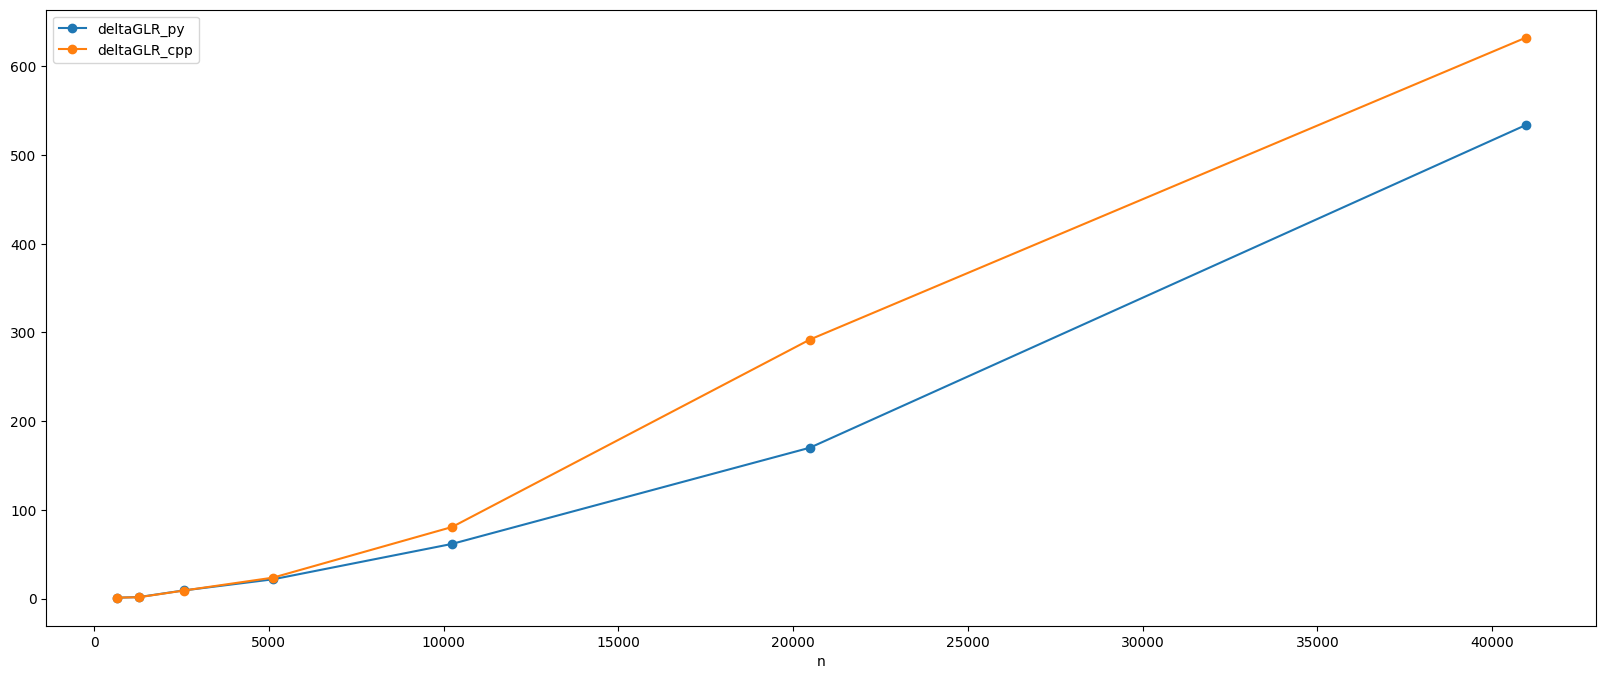

In [133]:
plot_column(comparison, ['deltaGLR_py', 'deltaGLR_cpp'], one_ax=True)

# Double Experiment (node doubled partition generated)

##### Filter results

In [42]:
dexpnode = all_data[ all_data["Flag"] == "2expnode"]
dexpnode = dexpnode[dexpnode["Code"] == programming_language]

##### Set number of nodes as ID

In [43]:
dexpnode.set_index("n", inplace=True)
dexpnode.sort_index(inplace=True)

##### Show total time

In [44]:
dexpnode[["Total"]]

,Total
n,
640,1.088366
1280,1.924820
2560,9.873072
5120,22.316076
10240,63.172659
20480,177.434354
40960,553.841357


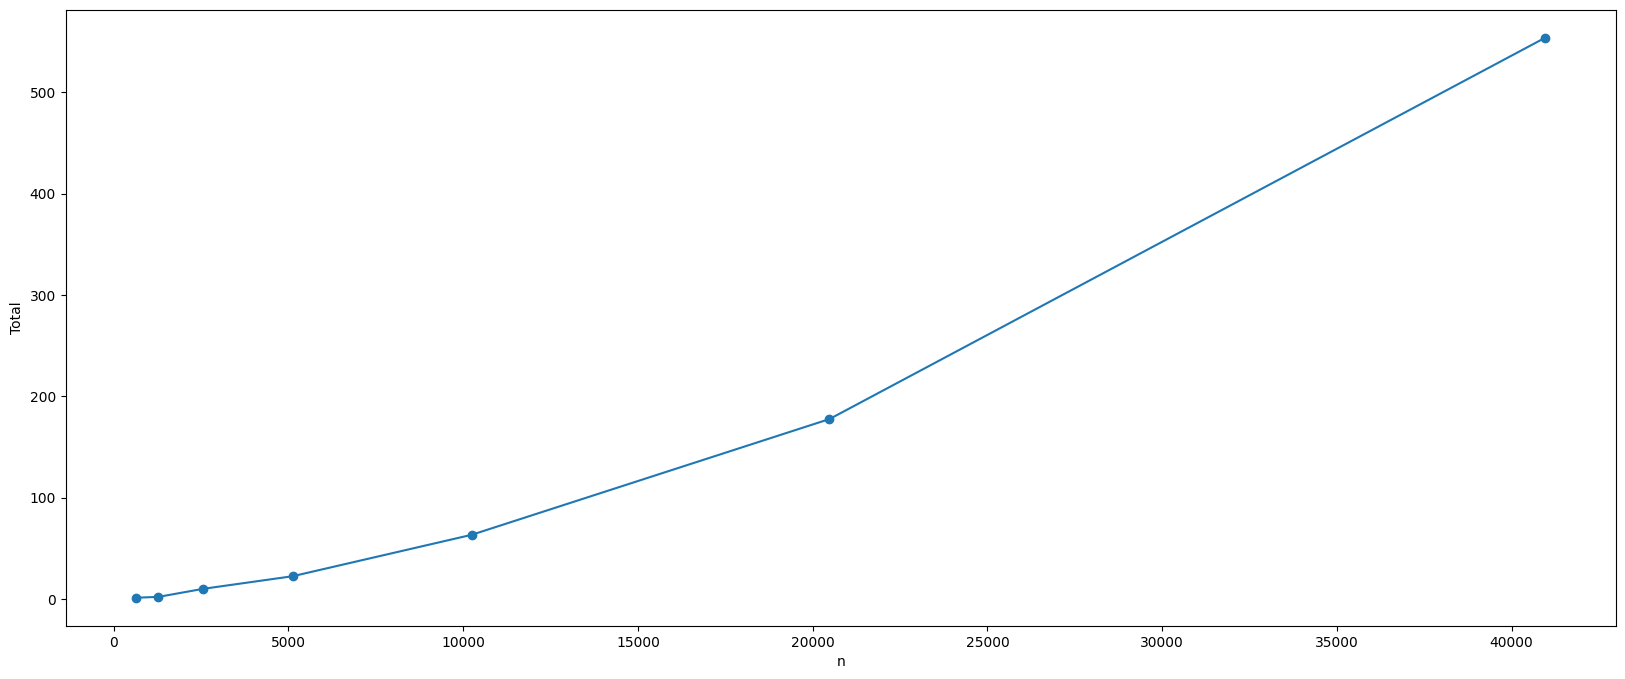

In [45]:
plot_column(dexpnode, ["Total"])

##### Show partitionsComputation

In [46]:
dexpnode[["Community computation"]]

,Community computation
n,
640,0.010916
1280,0.028270
2560,0.101592
5120,0.126090
10240,0.398006
20480,0.883681
40960,0.559704


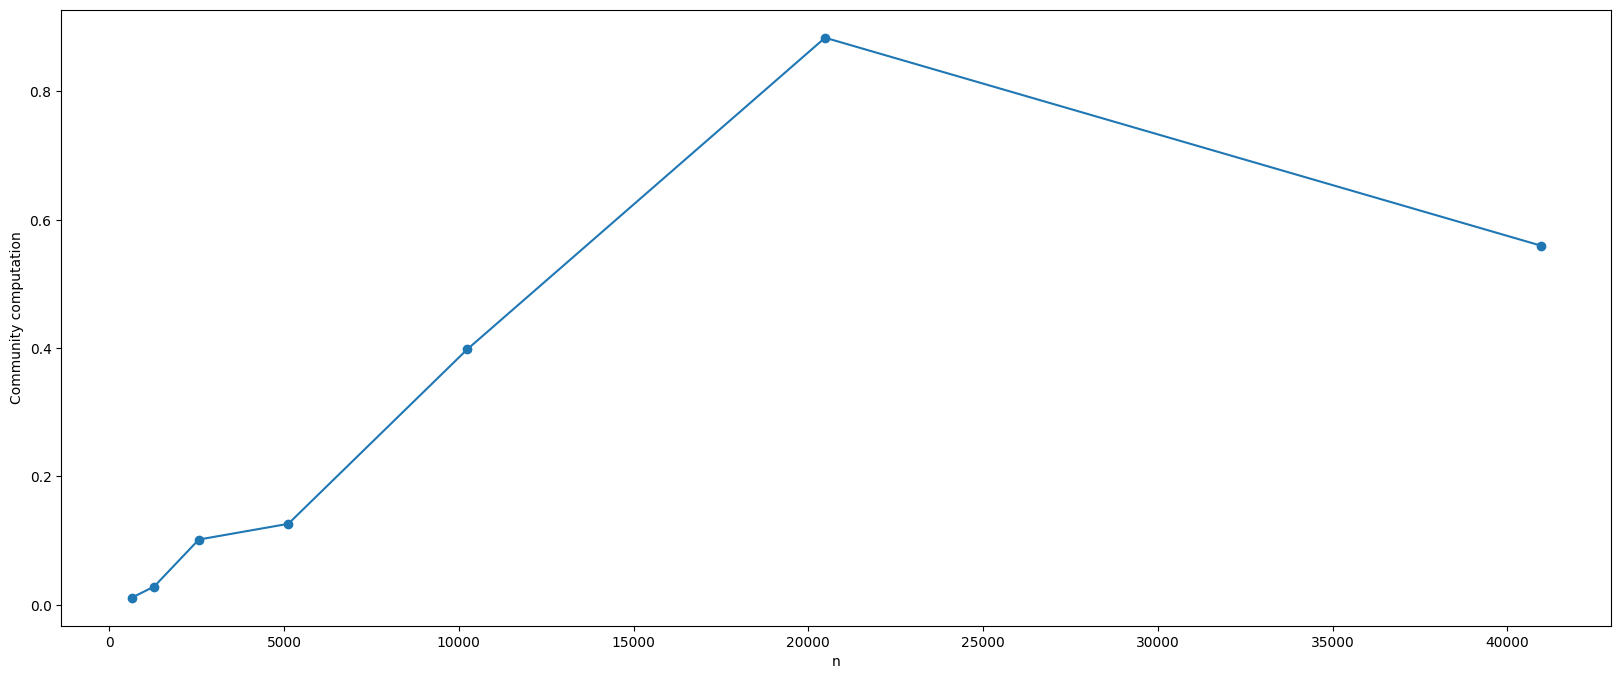

In [47]:
plot_column(dexpnode, ["Community computation"])

##### Show nodesComputation

In [48]:
dexpnode[["deltaNodesComputation"]]

,deltaNodesComputation
n,
640,0.056128
1280,0.136668
2560,0.556827
5120,0.395702
10240,1.081204
20480,6.408844
40960,19.456738


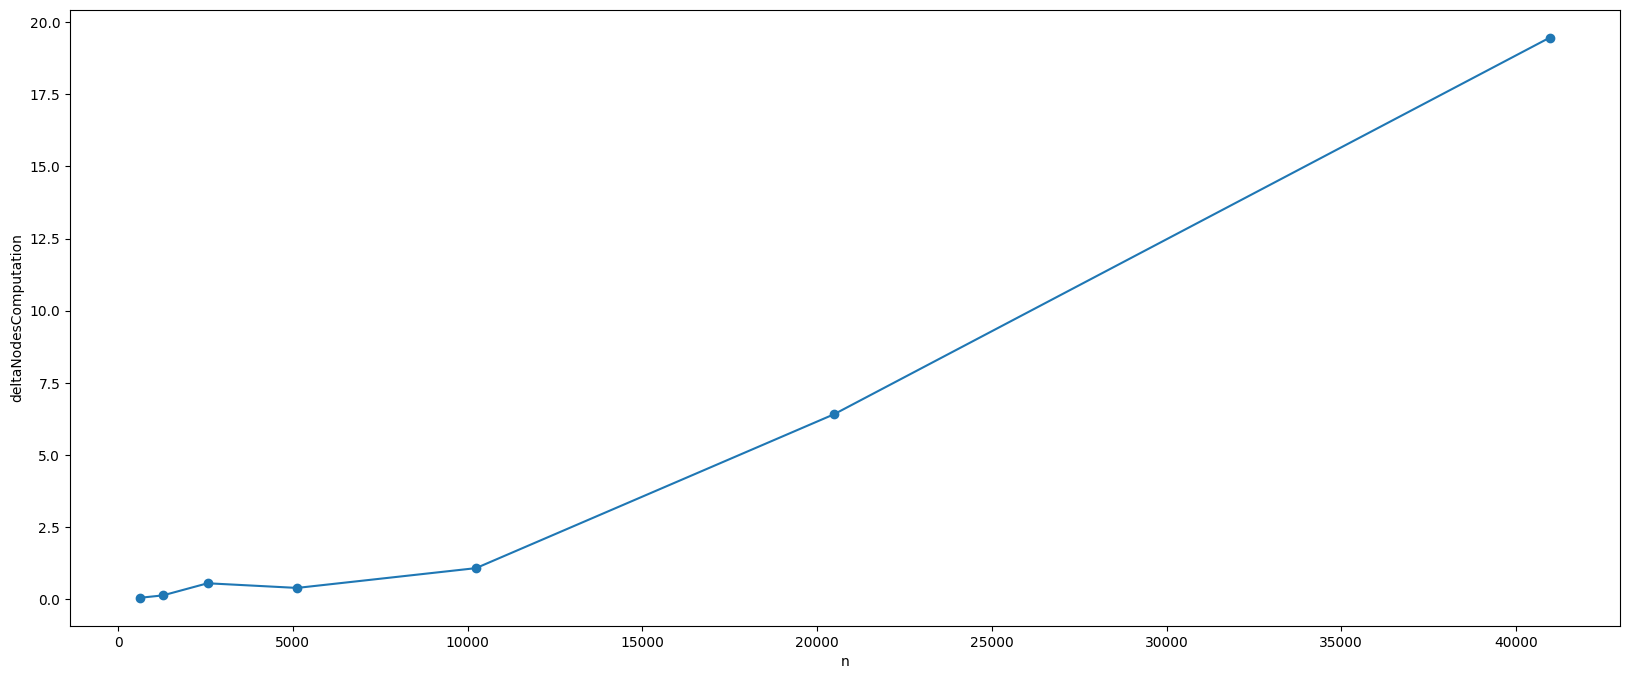

In [49]:
plot_column(dexpnode, ["deltaNodesComputation"])

##### Show deltaGLR

In [50]:
dexpnode[["deltaGLR"]]

,deltaGLR
n,
640,1.021142
1280,1.759103
2560,9.214019
5120,21.793205
10240,61.690864
20480,170.136189
40960,533.760837


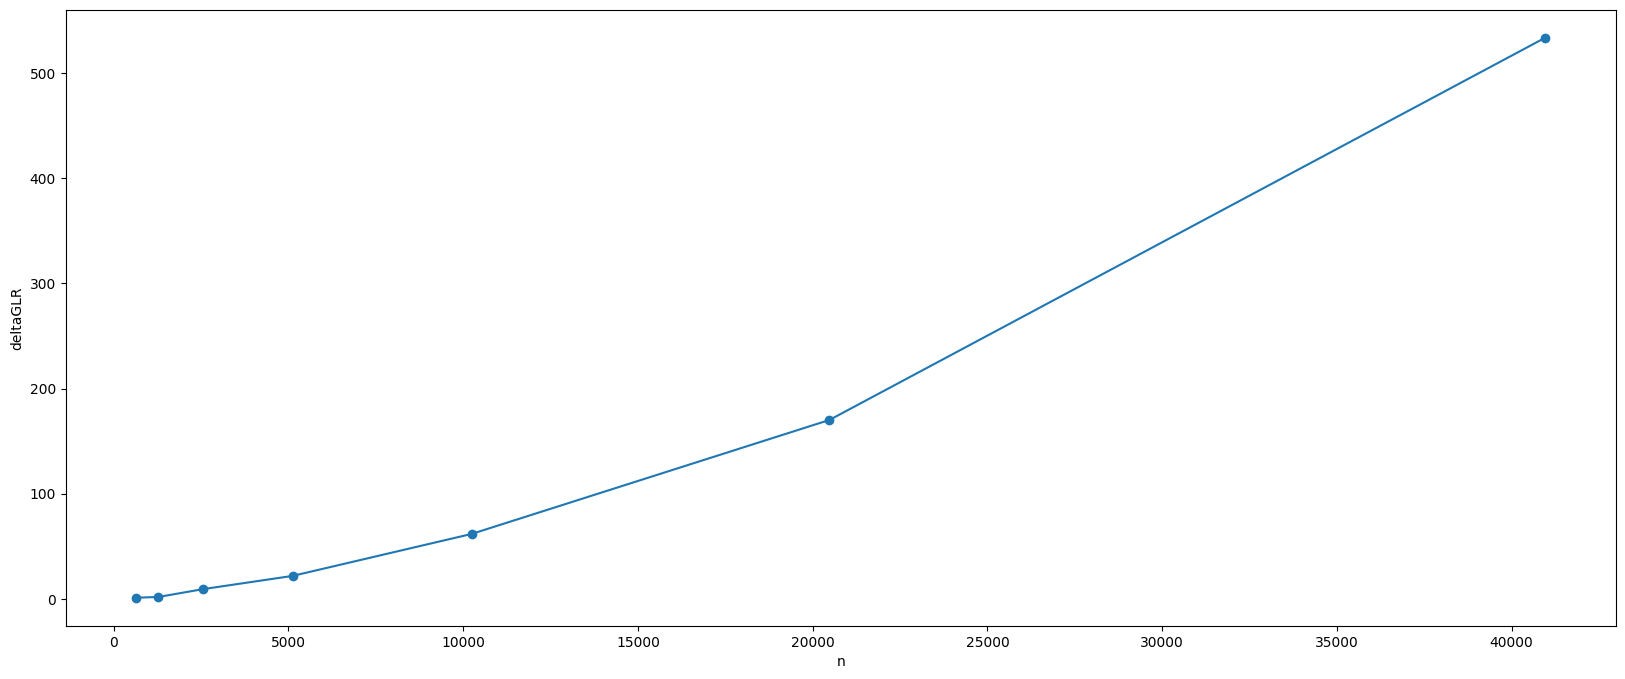

In [51]:
plot_column(dexpnode, ["deltaGLR"])

# Double Experiment (node with read partition)

##### Filter results

In [70]:
dexpnode_readp = all_data[ all_data["Flag"] == "2expnode(readPartition)"]
dexpnode_readp = dexpnode_readp[dexpnode_readp["Code"] == programming_language]

##### Set number of nodes as ID

In [71]:
dexpnode_readp.set_index("n", inplace=True)
dexpnode_readp.sort_index(inplace=True)

##### Set number of community 

In [72]:
def numberOfCommunity(graph_name):
    partition_name = graph_name[:-len(".graph")]
    partition_path = f"../partial_results/partitions/{partition_name}"
    print(partition_path)
    partition_reader = BinaryPartitionReader()
    partition = partition_reader.read(partition_path)
    return partition.numberOfSubsets()

In [73]:
dexpnode_readp["#Community"] = dexpnode_readp["Graph"].apply(numberOfCommunity)
dexpnode_readp

../partial_results/partitions/2expnode(n=640, m=50000)
../partial_results/partitions/2expnode(n=1280, m=50000)
../partial_results/partitions/2expnode(n=2560, m=50000)
../partial_results/partitions/2expnode(n=5120, m=50000)
../partial_results/partitions/2expnode(n=10240, m=50000)
../partial_results/partitions/2expnode(n=20480, m=50000)
../partial_results/partitions/2expnode(n=40960, m=50000)


,Code,Graph,Flag,Community computation,Nodes computation,GLR computation,Total,m,deltaNodesComputation,deltaGLR,#Community
n,,,,,,,,,,,
640,python,"2expnode(n=640, m=50000).graph",2expnode(readPartition),0.031250,0.234375,1.390625,1.390625,50000,0.203125,1.156250,8
1280,python,"2expnode(n=1280, m=50000).graph",2expnode(readPartition),0.015625,0.281250,2.062500,2.062500,50000,0.265625,1.781250,8
2560,python,"2expnode(n=2560, m=50000).graph",2expnode(readPartition),0.062500,4.718750,12.281250,12.281250,50000,4.656250,7.562500,3
5120,python,"2expnode(n=5120, m=50000).graph",2expnode(readPartition),0.078125,2.656250,17.906250,17.906250,50000,2.578125,15.250000,12
10240,python,"2expnode(n=10240, m=50000).graph",2expnode(readPartition),0.015625,4.000000,46.406250,46.406250,50000,3.984375,42.406250,22
20480,python,"2expnode(n=20480, m=50000).graph",2expnode(readPartition),0.312500,19.328125,130.562500,130.562500,50000,19.015625,111.234375,22
40960,python,"2expnode(n=40960, m=50000).graph",2expnode(readPartition),0.328125,81.531250,434.953125,434.984375,50000,81.203125,353.421875,113


##### compute Total/#Community

In [74]:
dexpnode_readp["Total/#Community"] = dexpnode_readp["Total"] / dexpnode_readp["#Community"]
dexpnode_readp[["#Community", "Total", "Total/#Community"]]

,#Community,Total,Total/#Community
n,,,
640,8,1.390625,0.173828
1280,8,2.062500,0.257812
2560,3,12.281250,4.093750
5120,12,17.906250,1.492188
10240,22,46.406250,2.109375
20480,22,130.562500,5.934659
40960,113,434.984375,3.849419


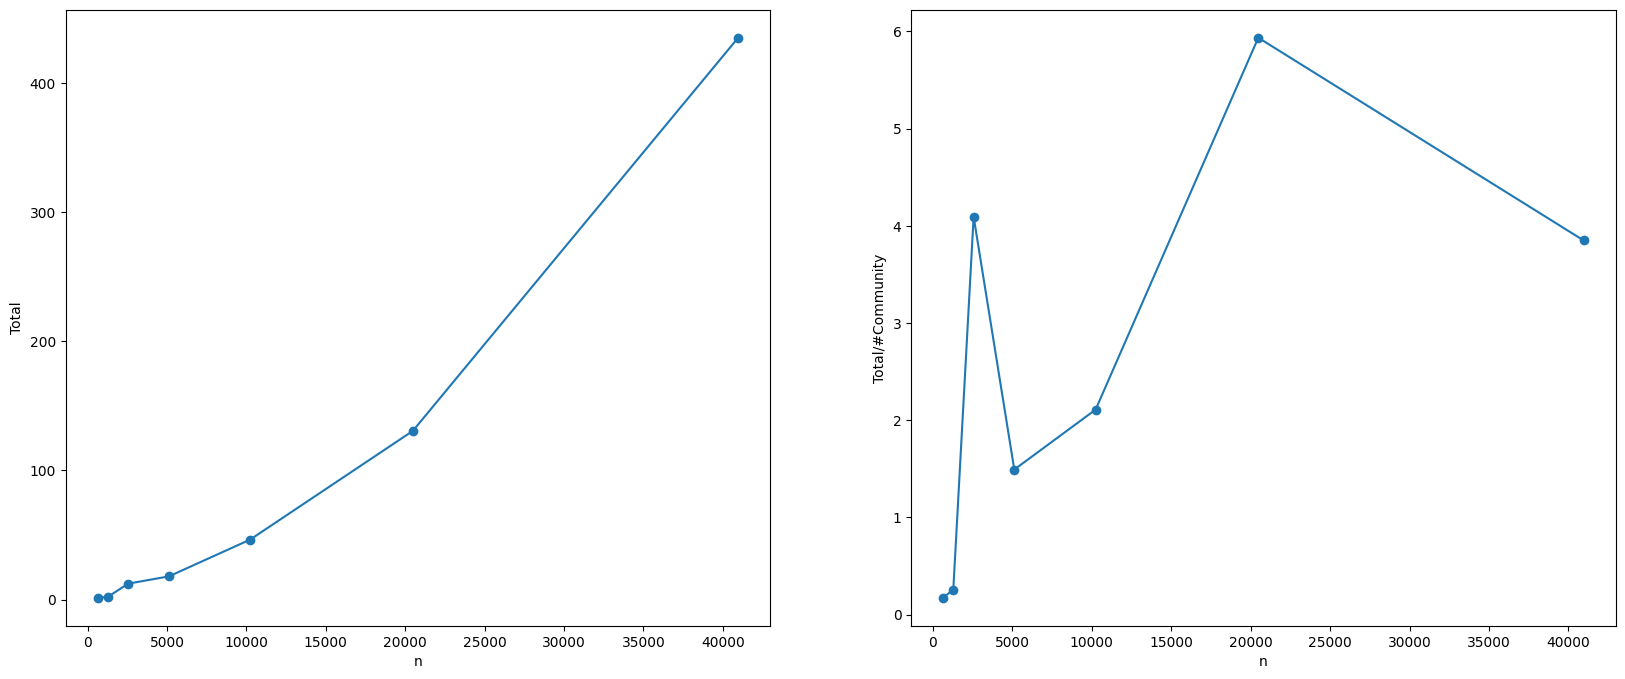

In [89]:
_, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))
ax1.set_ylabel("Total")
ax2.set_ylabel("Total/#Community")
dexpnode_readp["Total"].plot(marker="o", ax=ax1)
dexpnode_readp["Total/#Community"].plot(marker="o", ax=ax2)
plt.show()

##### Compute nodesComputation/#Community

In [90]:
dexpnode_readp["deltaNodesComputation/#Community"] = dexpnode_readp["deltaNodesComputation"] / dexpnode_readp["#Community"]
dexpnode_readp[["#Community", "deltaNodesComputation", "deltaNodesComputation/#Community"]]

,#Community,deltaNodesComputation,deltaNodesComputation/#Community
n,,,
640,8,0.203125,0.025391
1280,8,0.265625,0.033203
2560,3,4.656250,1.552083
5120,12,2.578125,0.214844
10240,22,3.984375,0.181108
20480,22,19.015625,0.864347
40960,113,81.203125,0.718612


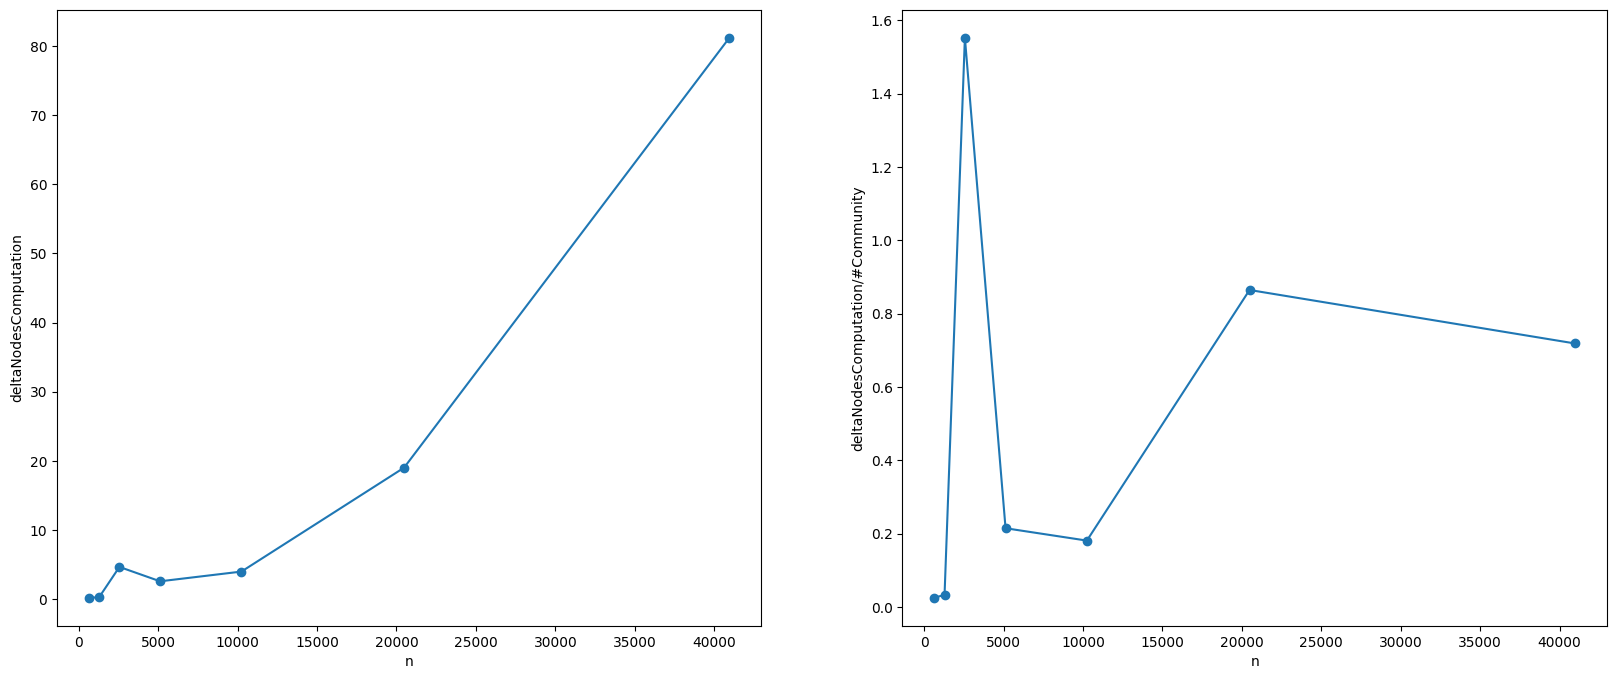

In [91]:
_, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))
ax1.set_ylabel("deltaNodesComputation")
ax2.set_ylabel("deltaNodesComputation/#Community")
dexpnode_readp["deltaNodesComputation"].plot(marker="o", ax=ax1)
dexpnode_readp["deltaNodesComputation/#Community"].plot(marker="o", ax=ax2)
plt.show()

##### Compute deltaGLR/#Community

In [93]:
dexpnode_readp["deltaGLR/#Community"] = dexpnode_readp["deltaGLR"] / dexpnode_readp["#Community"]
dexpnode_readp[["#Community", "deltaGLR", "deltaGLR/#Community"]]

,#Community,deltaGLR,deltaGLR/#Community
n,,,
640,8,1.156250,0.144531
1280,8,1.781250,0.222656
2560,3,7.562500,2.520833
5120,12,15.250000,1.270833
10240,22,42.406250,1.927557
20480,22,111.234375,5.056108
40960,113,353.421875,3.127627


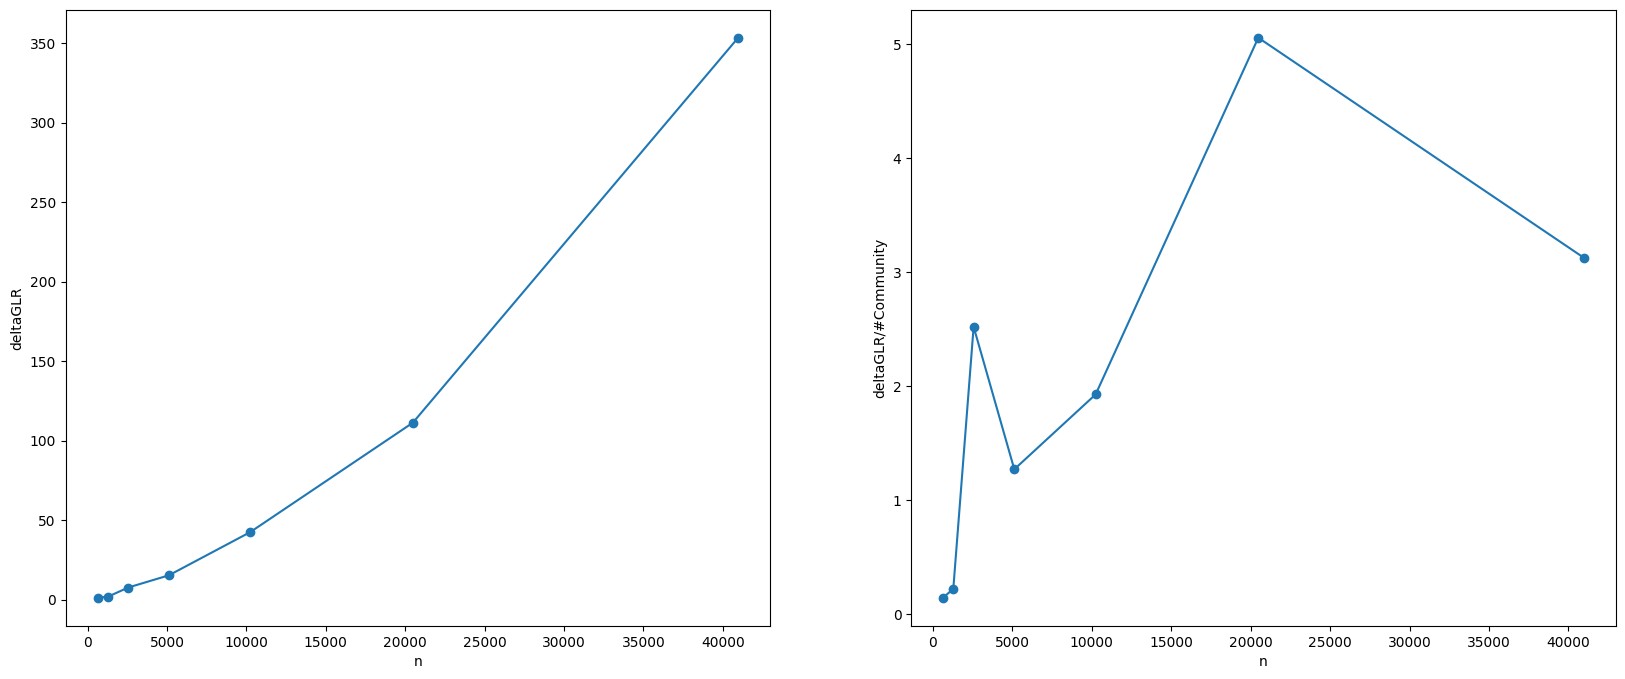

In [94]:
_, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))
ax1.set_ylabel("deltaGLR")
ax2.set_ylabel("deltaGLR/#Community")
dexpnode_readp["deltaGLR"].plot(marker="o", ax=ax1)
dexpnode_readp["deltaGLR/#Community"].plot(marker="o", ax=ax2)
plt.show()